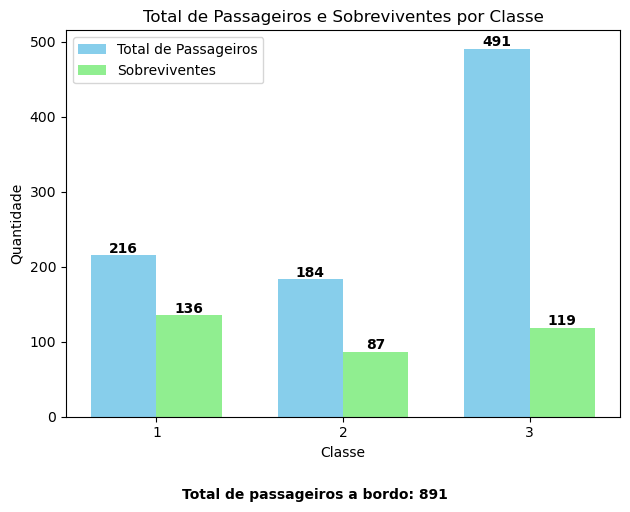

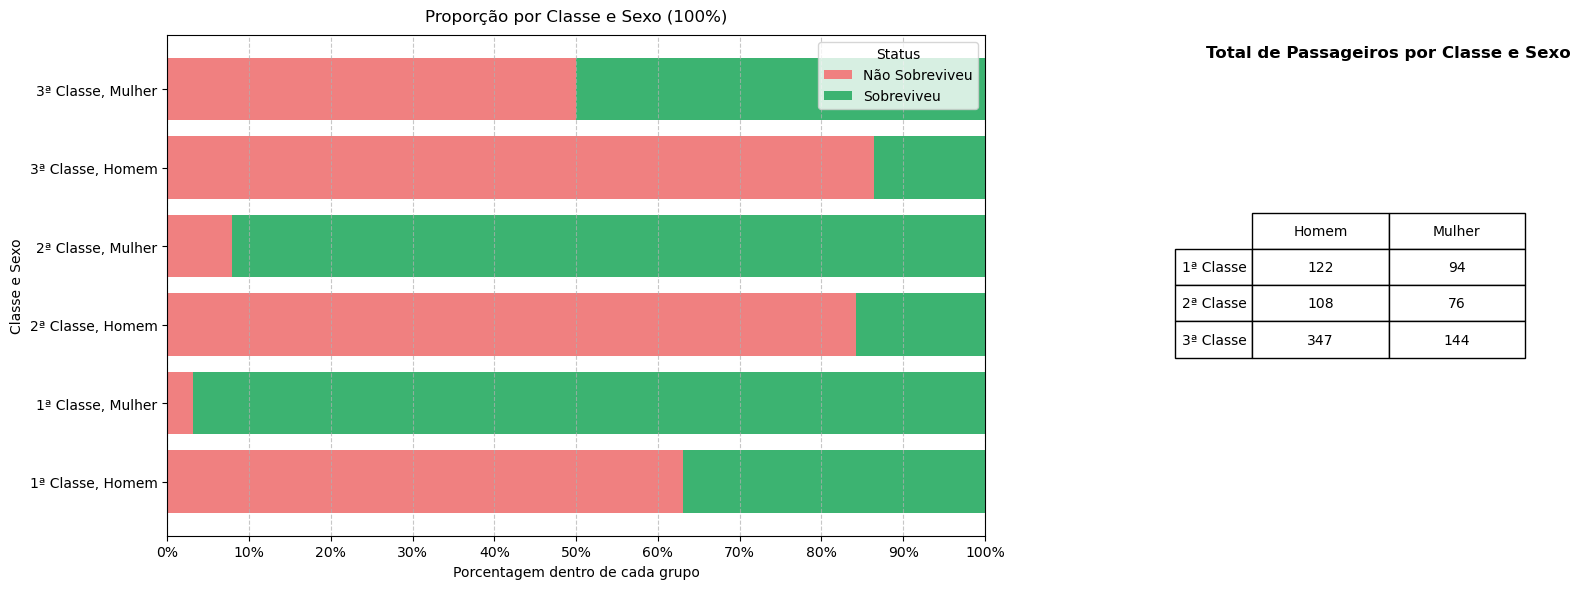

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import numpy as np

# Importa base de dados
df_titanic = pd.read_csv('Import/titanic.csv')

# Agrupando dados para o grafico
resumo = df_titanic.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']).reset_index()
resumo.columns = ['Classe', 'Total de Passageiros', 'Sobreviventes', 'Taxa de Sobrevivência (%)']
resumo['Taxa de Sobrevivência (%)'] = (resumo['Taxa de Sobrevivência (%)'] * 100).round(1)


classes = resumo['Classe'].astype(str)
total = resumo['Total de Passageiros']
sobreviventes = resumo['Sobreviventes']
x = np.arange(len(classes))
largura = 0.35


fig, ax = plt.subplots()
b1 = ax.bar(x - largura/2, total, width=largura, label='Total de Passageiros', color='skyblue')
b2 = ax.bar(x + largura/2, sobreviventes, width=largura, label='Sobreviventes', color='lightgreen')

ax.set_title('Total de Passageiros e Sobreviventes por Classe')
ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()


for barra in b1:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 3, str(int(altura)), ha='center', fontweight='bold')

for barra in b2:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 3, str(int(altura)), ha='center', fontweight='bold')


total_geral = resumo['Total de Passageiros'].sum()
plt.tight_layout()
plt.figtext(0.5, -0.05, f'Total de passageiros a bordo: {total_geral}', ha='center', fontsize=10, fontweight='bold')
plt.show()




df_titanic['Sexo'] = df_titanic['Sex'].replace({'male': 'Homem', 'female': 'Mulher'})
df_titanic['Status'] = df_titanic['Survived'].replace({0: 'Não Sobreviveu', 1: 'Sobreviveu'})


agrupado = df_titanic.groupby(['Pclass', 'Sexo', 'Status']).size().reset_index(name='Quantidade')
agrupado['Proporcao'] = agrupado.groupby(['Pclass', 'Sexo'])['Quantidade'].transform(lambda x: x / x.sum())


agrupado['Grupo'] = agrupado['Pclass'].replace({1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'}) + ', ' + agrupado['Sexo']
pivot = agrupado.pivot_table(index='Grupo', columns='Status', values='Proporcao').fillna(0)


tabela_totais = df_titanic.groupby(['Pclass', 'Sexo']).size().unstack().fillna(0).astype(int)
tabela_totais.index = tabela_totais.index.map({1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})


fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.3, 1])


ax0 = fig.add_subplot(gs[0])
grupos = pivot.index
nao_sobreviveu = pivot['Não Sobreviveu']
sobreviveu = pivot['Sobreviveu']

ax0.barh(grupos, nao_sobreviveu, color='lightcoral', label='Não Sobreviveu')
ax0.barh(grupos, sobreviveu, left=nao_sobreviveu, color='mediumseagreen', label='Sobreviveu')

ax0.set_title('Proporção por Classe e Sexo (100%)', pad=10)
ax0.set_xlabel('Porcentagem dentro de cada grupo')
ax0.set_ylabel('Classe e Sexo')
ax0.legend(title='Status')
ax0.set_xlim(0, 1)
ax0.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax0.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax0.grid(axis='x', linestyle='--', alpha=0.7)


ax1 = fig.add_subplot(gs[2])
ax1.axis('off')
ax1.text(0.5, 0.95, 'Total de Passageiros por Classe e Sexo',
         ha='center', va='bottom', transform=ax1.transAxes,
         fontsize=12, fontweight='bold')

tabela_plot = ax1.table(cellText=tabela_totais.values,
                        rowLabels=tabela_totais.index,
                        colLabels=tabela_totais.columns,
                        loc='center',
                        cellLoc='center')
tabela_plot.scale(1, 2)
tabela_plot.auto_set_font_size(False)
tabela_plot.set_fontsize(10)

plt.tight_layout()
plt.show()


